# Машинное обучение. ЛР №1
### Журавлёв Константин, М8О-408Б-17

Для работы были выбраны два датасета, содержащие данные о матчах в различных играх. Цель в обоих случаях - на основе имеющихся данных предсказать победу одной из сторон.  

Импортируем необходимые библиотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os

##### Датасет №1

Первый датасет - данные по онлайн играм в шахматы на сайте Lichess.org. Датасет содержит основные данные об игроках, а также о самой партии.

Начинаем с считывания самого датасета.

In [2]:
df = pd.read_csv('games.csv')
df.head().T

,0,1,2,3,4
id,TZJHLljE,l1NXvwaE,mIICvQHh,kWKvrqYL,9tXo1AUZ
rated,False,True,True,True,True
created_at,1.50421e+12,1.50413e+12,1.50413e+12,1.50411e+12,1.50403e+12
last_move_at,1.50421e+12,1.50413e+12,1.50413e+12,1.50411e+12,1.50403e+12
turns,13,16,61,61,95
victory_status,outoftime,resign,mate,mate,mate
winner,white,black,white,white,white
increment_code,15+2,5+10,5+10,20+0,30+3
white_id,bourgris,a-00,ischia,daniamurashov,nik221107
white_rating,1500,1322,1496,1439,1523


Слишком много столбцов содержат нечисловые данные. Для исправления конвертирум данные некоторых столбцов в числовой формат. Для уникальных имён партии, игроков, имён дебютов подойдёт простая трансформация в числа, т.к. нам не то чтобы очень важны эти данные. Перевод же победителя и статуса осуществим вручную, задав списки, которые заменяют определённые значения столбцов. Данные о ходах в партии можно было бы и не изменять, но интерес представляет то, сколько уникальных партий было в данном датасете, поэтому также их заменим уникальными числовыми идентификаторами.

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['id']    = labelencoder.fit_transform(df['id'])
df['rated']    = labelencoder.fit_transform(df['rated']) 
df['winner'].replace(['white','black','draw'],[0,2,1],inplace = True) 
df['victory_status'].replace(['outoftime','resign','mate','draw'],[0,1,2,3],inplace = True)
df['white_id']    = labelencoder.fit_transform(df['white_id']) 
df['black_id']    = labelencoder.fit_transform(df['black_id']) 
df['opening_eco']    = labelencoder.fit_transform(df['opening_eco'])  
df['opening_name']    = labelencoder.fit_transform(df['opening_name']) 
df['moves']    = labelencoder.fit_transform(df['moves']) 

Введём новый столбец, который бы наглядно показывал разницу в рейтинге на сайте между игроком белых и чёрных. Таким образом будет проще увидить закономерности в том, зависит ли победитель от рейтинга. 

In [4]:
df.insert(12,"rating_delta",0)
for j in range(df['rating_delta'].size):
    df.at[j,'rating_delta'] = df.at[j,'white_rating'] - df.at[j,'black_rating']

После всех преобразований посмотрим на данный датасет. Можно заметить, что средняя разница в рейтингах в пользу игрока белыми, также как и побед, хоть и не на много, но больше у белых. Также интересно, что на 20 тысяч партий имеется только чуть меньше 19 тысяч уникальных комбинаций ходов.

In [5]:
print('Info\n', df.info())
print('Describe\n', df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
id                20058 non-null int32
rated             20058 non-null int64
created_at        20058 non-null float64
last_move_at      20058 non-null float64
turns             20058 non-null int64
victory_status    20058 non-null int64
winner            20058 non-null int64
increment_code    20058 non-null object
white_id          20058 non-null int32
white_rating      20058 non-null int64
black_id          20058 non-null int32
black_rating      20058 non-null int64
rating_delta      20058 non-null int64
moves             20058 non-null int32
opening_eco       20058 non-null int32
opening_name      20058 non-null int32
opening_ply       20058 non-null int64
dtypes: float64(2), int32(6), int64(8), object(1)
memory usage: 2.1+ MB
Info
 None
Describe
                  id         rated    created_at  last_move_at         turns  \
count  20058.000000  20058.000000  2.005800e+04  2.

In [6]:
df['moves'].unique().size

18920

Посмотрим на зависимости между данными, а также сами данные после всех преобразований.

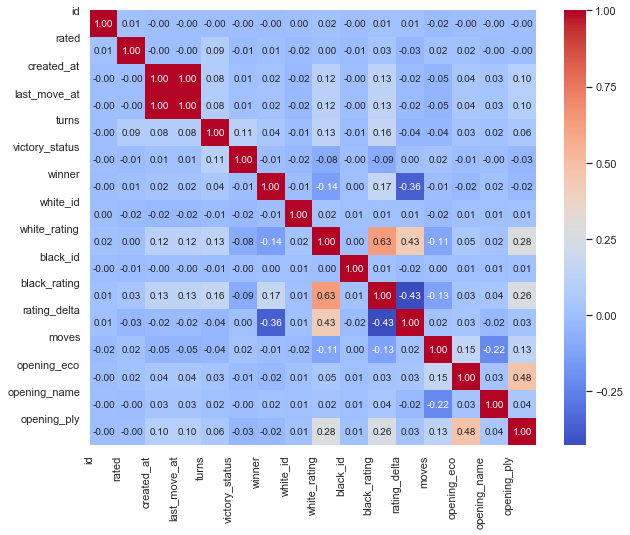

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,rating_delta,moves,opening_eco,opening_name,opening_ply
0,9068,0,1.504210e+12,1.504210e+12,13,0,0,15+2,1287,1500,11,1191,309,4524,248,1387,5
1,14512,1,1.504130e+12,1.504130e+12,16,1,2,5+10,16,1322,7748,1261,61,1987,71,750,4
2,14904,1,1.504130e+12,1.504130e+12,61,2,0,5+10,3823,1496,11,1500,-4,16383,171,650,3
3,14350,1,1.504110e+12,1.504110e+12,61,2,0,20+0,2017,1439,134,1454,-15,3770,241,992,3
4,3091,1,1.504030e+12,1.504030e+12,95,2,0,30+3,6056,1523,134,1469,54,15622,192,783,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,4563,1,1.499791e+12,1.499791e+12,24,1,0,10+10,1079,1691,4046,1220,471,6118,61,191,2
20054,9954,1,1.499698e+12,1.499699e+12,82,2,2,10+0,3921,1233,2855,1196,37,5421,37,960,2
20055,18757,1,1.499698e+12,1.499698e+12,35,2,0,10+0,3921,1219,7464,1286,-67,3431,239,977,3
20056,11344,1,1.499696e+12,1.499697e+12,109,1,0,10+0,5235,1360,4046,1227,133,11217,78,806,4


In [7]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)+1), corr.columns);
plt.yticks(range(len(corr.columns)+1), corr.columns)
plt.show()
df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012054D48>,
      dtype=object)

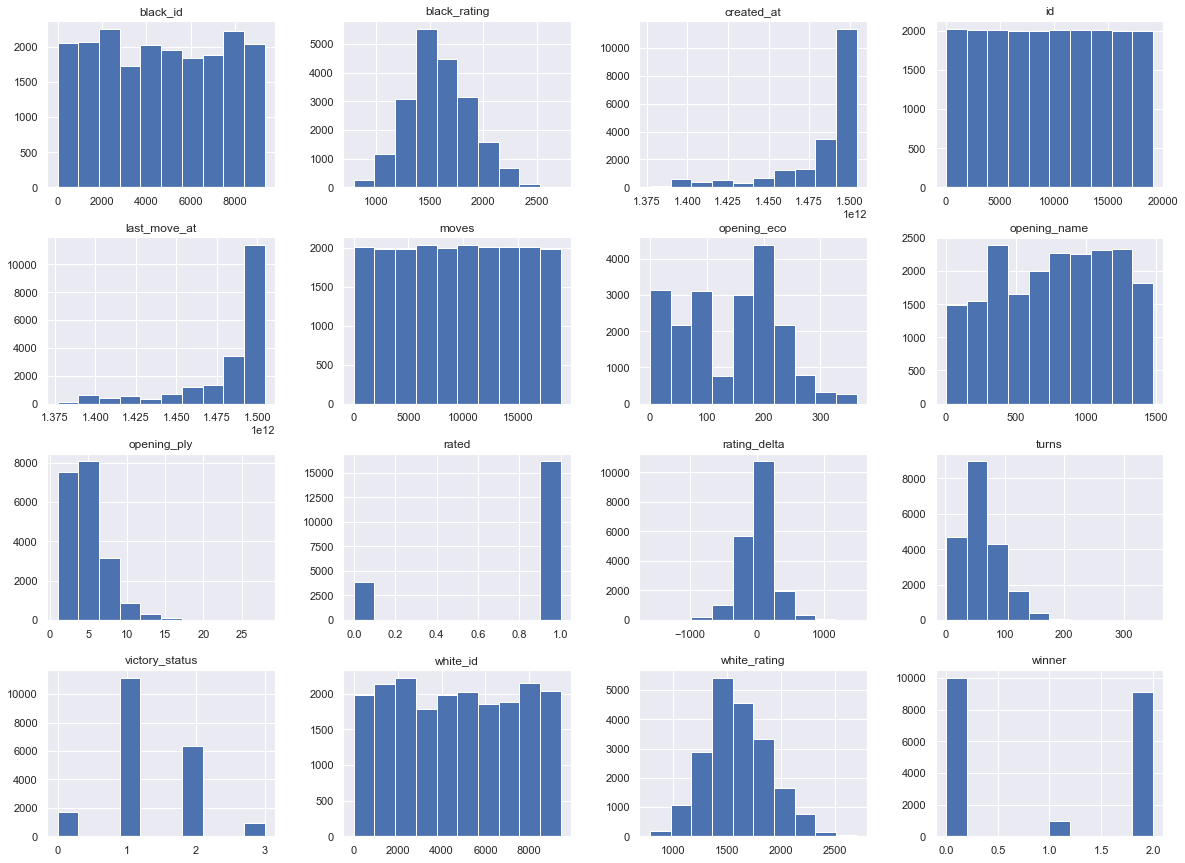

In [8]:
df.hist(figsize=(20,15))

##### Датасет №2

Второй датасет - данные за ~10 тысяч рейтинговых игр из LoL на момент 10 минуты игры.
В этот раз данные преобразовывать практически не нужно, всё уже представлено в читаемом формате.

In [9]:
df2 = pd.read_csv('high_diamond_ranked_10min.csv')
df2.head().T

,0,1,2,3,4
gameId,4.519158e+09,4.523372e+09,4.521475e+09,4.524384e+09,4.436034e+09
blueWins,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
blueWardsPlaced,2.800000e+01,1.200000e+01,1.500000e+01,4.300000e+01,7.500000e+01
blueWardsDestroyed,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
blueFirstBlood,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
blueKills,9.000000e+00,5.000000e+00,7.000000e+00,4.000000e+00,6.000000e+00
blueDeaths,6.000000e+00,5.000000e+00,1.100000e+01,5.000000e+00,6.000000e+00
blueAssists,1.100000e+01,5.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
blueEliteMonsters,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
blueDragons,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00


In [10]:
df2

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


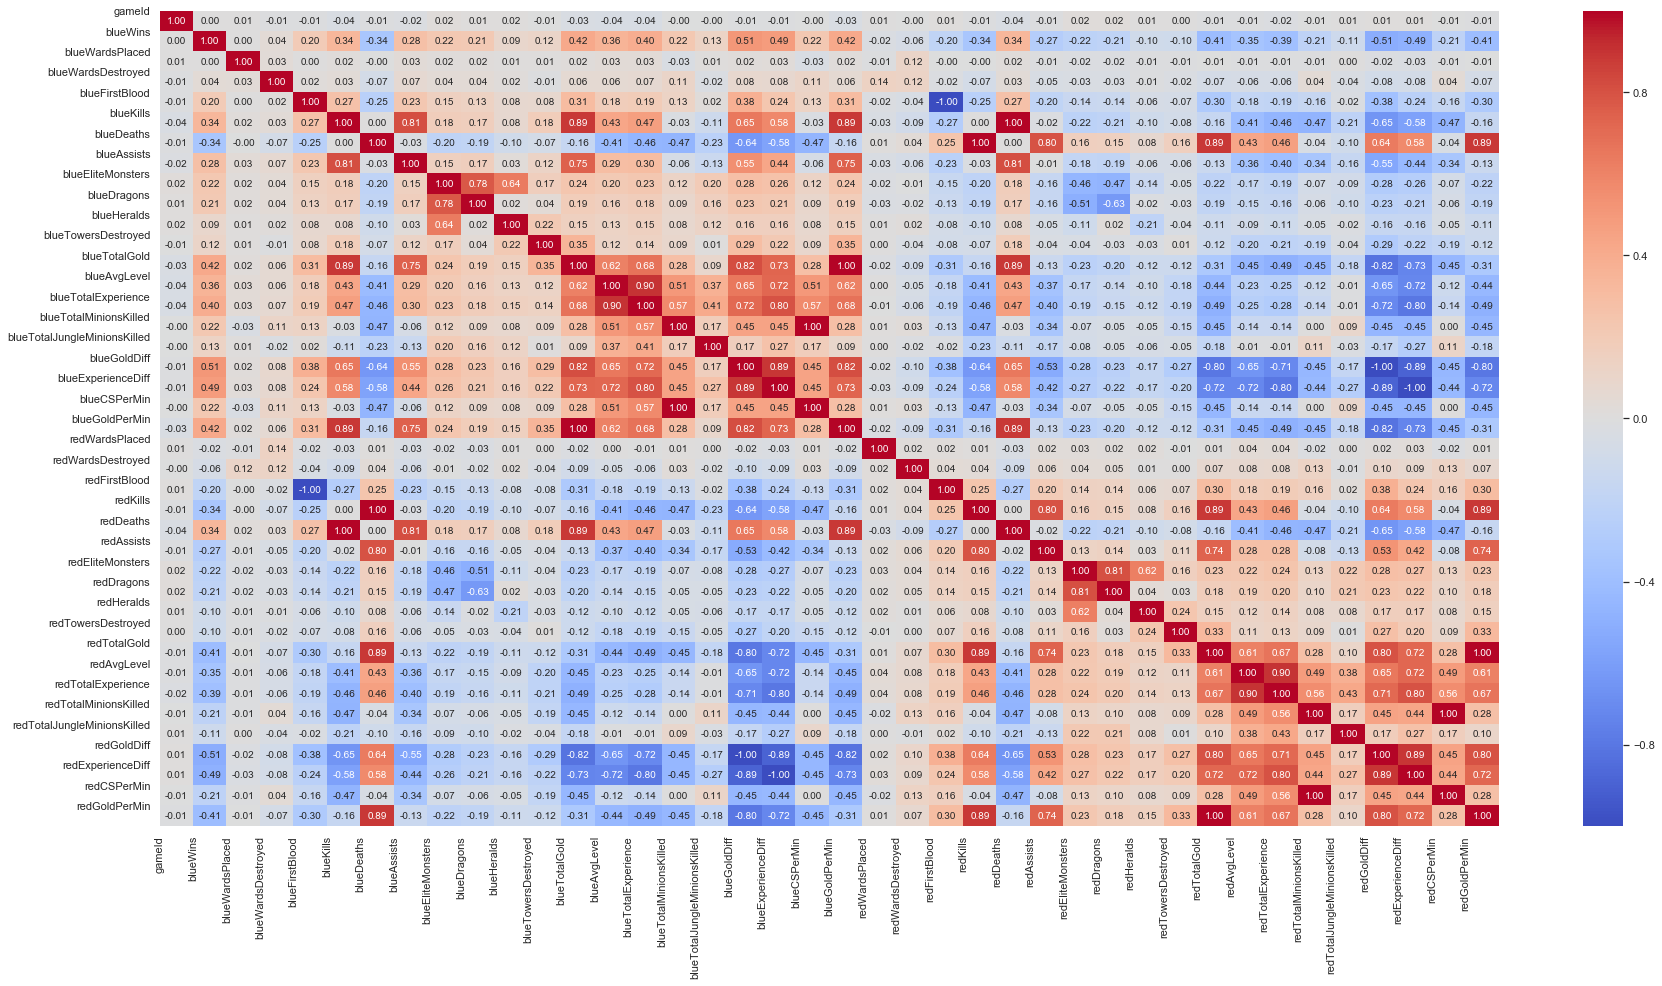

In [11]:
corr2 = df2.corr()
fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(corr2, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr2.columns)+1), corr2.columns);
plt.yticks(range(len(corr2.columns)+1), corr2.columns)
plt.show()

In [12]:
print('Info\n', df2.info())
print('Describe\n', df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
gameId                          9879 non-null int64
blueWins                        9879 non-null int64
blueWardsPlaced                 9879 non-null int64
blueWardsDestroyed              9879 non-null int64
blueFirstBlood                  9879 non-null int64
blueKills                       9879 non-null int64
blueDeaths                      9879 non-null int64
blueAssists                     9879 non-null int64
blueEliteMonsters               9879 non-null int64
blueDragons                     9879 non-null int64
blueHeralds                     9879 non-null int64
blueTowersDestroyed             9879 non-null int64
blueTotalGold                   9879 non-null int64
blueAvgLevel                    9879 non-null float64
blueTotalExperience             9879 non-null int64
blueTotalMinionsKilled          9879 non-null int64
blueTotalJungleMinionsKilled    9879 non-null int64
blueGol

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001629FA08>,
      dtype=object)

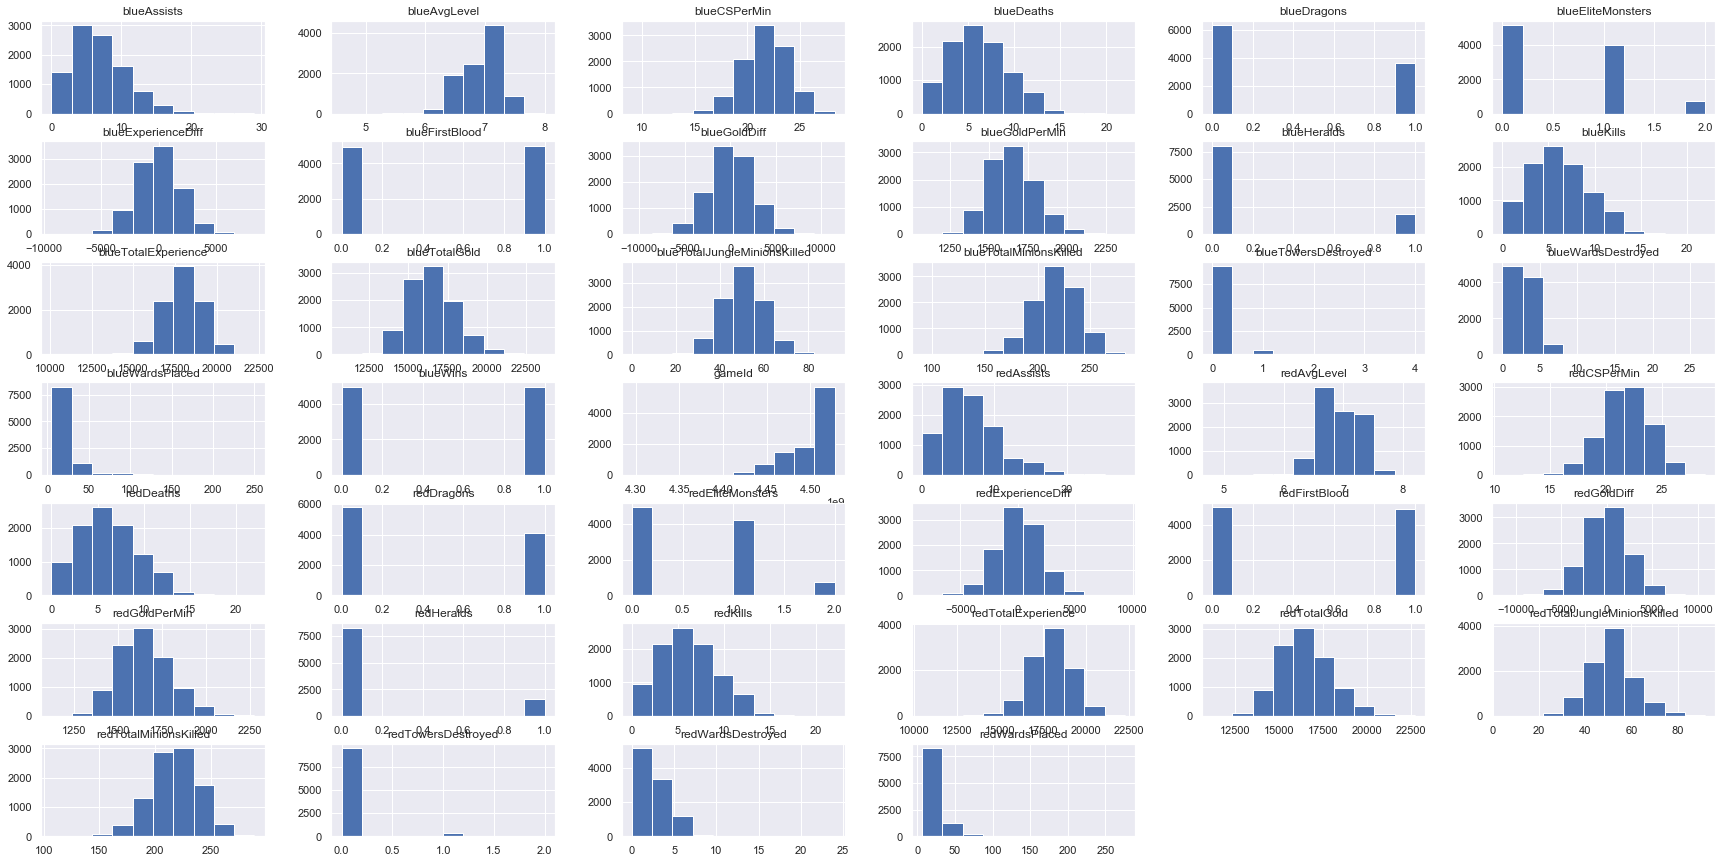

In [13]:
df2.hist(figsize=(30,15))

In [14]:
df.to_csv(path_or_buf = "Chess_ready.csv")
df2.to_csv(path_or_buf = "LoL_ready.csv")